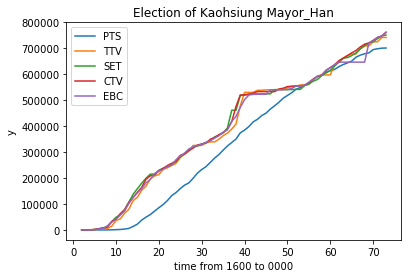

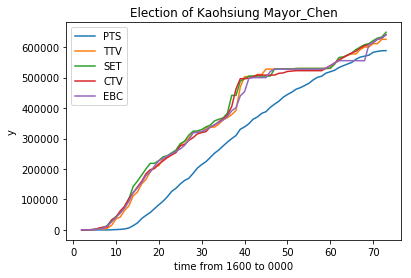

In [47]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = []
x2 = []
y = [[],[],[],[],[]]
y2 = [[],[],[],[],[]]



#Time-Han	PTS	TTV	SET	CTV	EBC	Time-Chen	PTS	TTV	SET	CTV	EBC
with open('election.csv', 'r') as csvfile:
    plots = csv.reader(csvfile)
    for row in plots:
        if(row != ['','','','','']):
            x.append(row[0])
            for j in range(0,5):
                y[j].append(row[j+1])

with open('election2.csv', 'r') as csvfile:
    plots2 = csv.reader(csvfile)
    for row in plots2:
        if(row != ['','','','','']):
            x2.append(row[0])
            for j in range(0,5):
                y2[j].append(row[j+1])

plt.plot(x[1:73],y[0][1:73], label='PTS')
plt.plot(x[1:73],y[1][1:73], label='TTV')
plt.plot(x[1:73],y[2][1:73], label='SET')
plt.plot(x[1:73],y[3][1:73], label='CTV')
plt.plot(x[1:73],y[4][1:73], label='EBC')
plt.xlabel('time from 1600 to 0000')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Han')
plt.legend()
plt.show()

plt.plot(x2[1:73],y2[0][1:73], label='PTS')
plt.plot(x2[1:73],y2[1][1:73], label='TTV')
plt.plot(x2[1:73],y2[2][1:73], label='SET')
plt.plot(x2[1:73],y2[3][1:73], label='CTV')
plt.plot(x2[1:73],y2[4][1:73], label='EBC')
plt.xlabel('time from 1600 to 0000')
plt.ylabel('y')
plt.title('Election of Kaohsiung Mayor_Chen')
plt.legend()
plt.show()